<a href="https://colab.research.google.com/github/ASAbuSayem/ADS_Lab/blob/main/Practical_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practical 3: Design, Develop and Implement a menu driven Program in C for the following operations on Binary Search Tree (BST) of Integers

a)	Create a BST of N Integers: 6, 9, 5,2, 8,15, 24, 14,7,8, 5, 2

b)	Traverse the BST in Inorder, Preorder and Post Order

c)	Search the BST for a given element (KEY) and report the appropriate message

d)	Delete an element(ELEM) from BST

e)	Exit

**🧠 Practical 3: Binary Search Tree Operations in Python**

In [1]:
# (a) Create BST of Integers
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

# BST তে নতুন মান ইনসার্ট করার ফাংশন
def insert(root, key):
    if root is None:
        return Node(key)
    elif key < root.key:
        root.left = insert(root.left, key)
    elif key > root.key:
        root.right = insert(root.right, key)
    # ডুপ্লিকেট মান BST তে রাখা হয় না
    return root

# Create BST
def create_bst(elements):
    root = None
    for el in elements:
        root = insert(root, el)
    return root

In [2]:
# (b) BST Traversals

def inorder(root):
    if root:
        inorder(root.left)
        print(root.key, end=" ")

def preorder(root):
    if root:
        print(root.key, end=" ")
        preorder(root.left)
        preorder(root.right)

def postorder(root):
    if root:
        postorder(root.left)
        postorder(root.right)
        print(root.key, end=" ")

In [3]:
# (c) Search in BST
def search(root, key):
    if root is None:
        return False
    if root.key == key:
        return True
    elif key < root.key:
        return search(root.left, key)
    else:
        return search(root.right, key)

In [4]:
# (d) Delete from BST
def find_min(root):
    current = root
    while current.left is not None:
        current = current.left
    return current

def delete(root, key):
    if root is None:
        return root

    if key < root.key:
        root.left = delete(root.left, key)
    elif key > root.key:
        root.right = delete(root.right, key)
    else:
        # এক বা দুই child থাকলে
        if root.left is None:
            return root.right
        elif root.right is None:
            return root.left

        # দুই child থাকলে: inorder successor খুঁজে সেট করা
        temp = find_min(root.right)
        root.key = temp.key
        root.right = delete(root.right, temp.key)

    return root

In [5]:
# (e) Menu Driven Program
def main():
    elements = [6, 9, 5, 2, 8, 15, 24, 14, 7, 8, 5, 2]
    root = create_bst(elements)
    print("Binary Search Tree created successfully!")

    while True:
        print("\n===== BST Operations =====")
        print("1. Inorder Traversal")
        print("2. Preorder Traversal")
        print("3. Postorder Traversal")
        print("4. Search an Element")
        print("5. Delete an Element")
        print("6. Exit")

        choice = int(input("Enter your choice (1-6): "))

        if choice == 1:
            print("Inorder Traversal: ", end="")
            inorder(root)
            print()

        elif choice == 2:
            print("Preorder Traversal: ", end="")
            preorder(root)
            print()

        elif choice == 3:
            print("Postorder Traversal: ", end="")
            postorder(root)
            print()

        elif choice == 4:
            key = int(input("Enter element to search: "))
            if search(root, key):
                print(f"{key} found in BST")
            else:
                print(f"{key} not found in BST")

        elif choice == 5:
            elem = int(input("Enter element to delete: "))
            root = delete(root, elem)
            print(f"{elem} deleted from BST (if it existed).")

        elif choice == 6:
            print("Exiting program... Thank You")
            break

        else:
            print("Invalid choice! Try again.")

if __name__ == "__main__":
    main()

Binary Search Tree created successfully!

===== BST Operations =====
1. Inorder Traversal
2. Preorder Traversal
3. Postorder Traversal
4. Search an Element
5. Delete an Element
6. Exit
Enter your choice (1-6): 1
Inorder Traversal: 2 5 6 

===== BST Operations =====
1. Inorder Traversal
2. Preorder Traversal
3. Postorder Traversal
4. Search an Element
5. Delete an Element
6. Exit
Enter your choice (1-6): 2
Preorder Traversal: 6 5 2 9 8 7 15 14 24 

===== BST Operations =====
1. Inorder Traversal
2. Preorder Traversal
3. Postorder Traversal
4. Search an Element
5. Delete an Element
6. Exit
Enter your choice (1-6): 3
Postorder Traversal: 2 5 7 8 14 24 15 9 6 

===== BST Operations =====
1. Inorder Traversal
2. Preorder Traversal
3. Postorder Traversal
4. Search an Element
5. Delete an Element
6. Exit
Enter your choice (1-6): 4
Enter element to search: 15
15 found in BST

===== BST Operations =====
1. Inorder Traversal
2. Preorder Traversal
3. Postorder Traversal
4. Search an Element
5. De

In [6]:
# BST Visualization using NetworkX and Matplotlib

import matplotlib.pyplot as plt
import networkx as nx

In [7]:
# -------- BST Node Class --------
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

In [8]:
# -------- Insert Function --------
def insert(root, key):
    if root is None:
        return Node(key)
    elif key < root.key:
        root.left = insert(root.left, key)
    elif key > root.key:
        root.right = insert(root.right, key)
    return root

In [9]:
# -------- Create BST --------
def create_bst(elements):
    root = None
    for el in elements:
        root = insert(root, el)
    return root

In [10]:
# -------- BST to Graph (for visualization) --------
def add_edges(graph, root, pos, x=0, y=0, layer=1):
    if root is not None:
        graph.add_node(root.key)
        if root.left:
            graph.add_edge(root.key, root.left.key)
            l = x - 1 / layer
            pos[root.left.key] = (l, y - 1)
            add_edges(graph, root.left, pos, x=l, y=y - 1, layer=layer + 1)
        if root.right:
            graph.add_edge(root.key, root.right.key)
            r = x + 1 / layer
            pos[root.right.key] = (r, y - 1)
            add_edges(graph, root.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph, pos

In [11]:
# -------- Plot BST --------
def draw_bst(root):
    graph = nx.DiGraph()
    pos = {root.key: (0, 0)}
    graph, pos = add_edges(graph, root, pos)
    plt.figure(figsize=(10, 6))
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=1500,
        node_color="lightblue",
        font_size=12,
        font_weight="bold",
        arrows=False
    )
    plt.title("Binary Search Tree Visualization", fontsize=14)
    plt.show()

BST created successfully with elements: [6, 9, 5, 2, 8, 15, 24, 14, 7, 8, 5, 2]


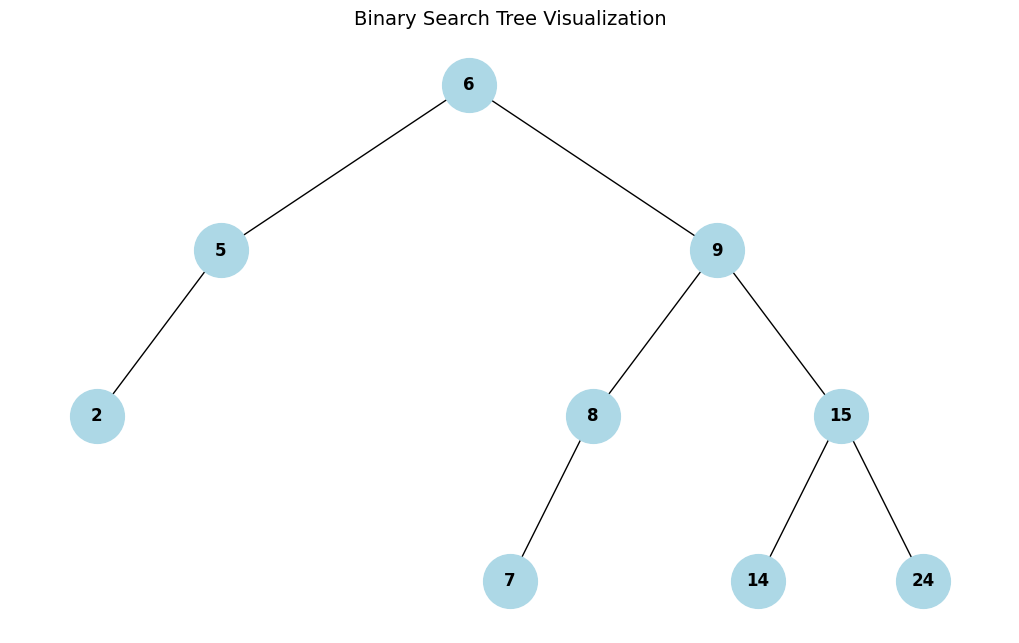

In [12]:
# -------- Main Program --------
elements = [6, 9, 5, 2, 8, 15, 24, 14, 7, 8, 5, 2]
root = create_bst(elements)
print("BST created successfully with elements:", elements)
draw_bst(root)